In [7]:
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

In [9]:
# loading any random image
train_path = 'C:/Users/gonca/Desktop/LiveCell/train/'
test_path  = 'C:/Users/gonca/Desktop/LiveCell/test/'
val_path   = 'C:/Users/gonca/Desktop/LiveCell/valid/'

In [11]:
train_images = [image for image in os.listdir(train_path) if image[-3:] =='jpg' ]
test_images = [image for image in os.listdir(test_path) if image[-3:] =='jpg' ]
val_images = [image for image in os.listdir(val_path) if image[-3:] =='jpg' ]
len(train_images),len(test_images),len(val_images)

(1502, 215, 429)

In [13]:
import glob
import os

train_annotations = glob.glob(os.path.join(train_path, '*.json'))
test_annotations = glob.glob(os.path.join(test_path, '*.json'))
val_annotations = glob.glob(os.path.join(val_path, '*.json'))

In [17]:
import json

In [19]:
train_annotations = json.load(open(train_annotations[0]))
test_annotations = json.load(open(test_annotations[0]))
val_annotations = json.load(open(val_annotations[0]))

In [21]:
len(train_annotations['annotations']),len(test_annotations['annotations']),len(val_annotations['annotations']),

(1502, 215, 429)

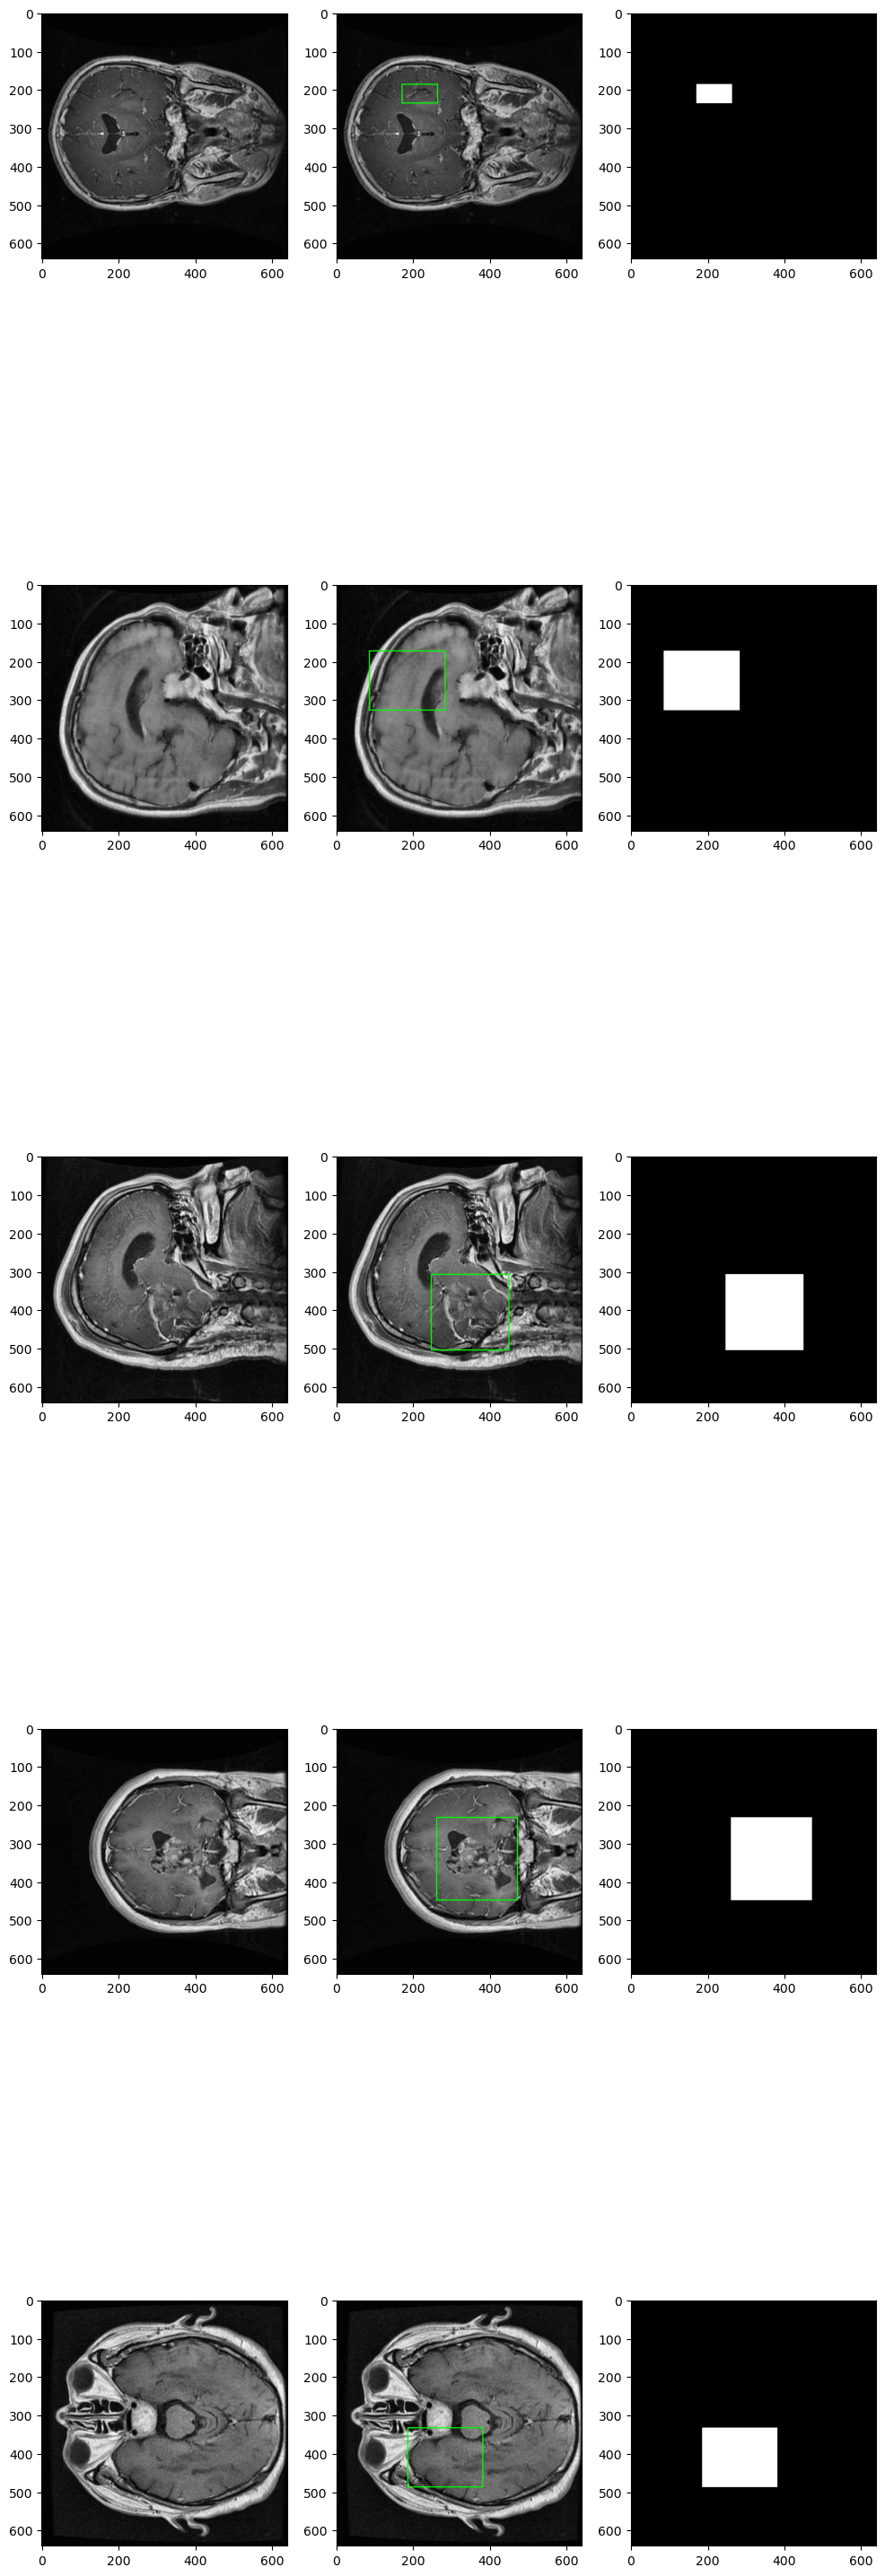

In [23]:
import matplotlib.pyplot as plt
def visualize_random_images(n=5):
  # select n random images
  # use cv and plt to show these images
  indices = np.random.randint(0, len(train_annotations['images']), size=n)

  images =[train_annotations['images'][i] for i in indices ]

  annotations = [train_annotations['annotations'][i] for i in indices ]
  j=1
  plt.figure(figsize=(12, 4 * 2 * n))
  for img,ann in zip(images,annotations):
    plt.subplot(n,3,j)
    j+=1
    image = cv2.imread(train_path + img['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    # create masked images from annotations
    segmentation = ann['segmentation']
    segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)

    cv2.polylines(image, [segmentation], isClosed=True, color=(0, 255, 0), thickness=2)  # Green color with thickness 2

    plt.subplot(n,3,j)

    plt.imshow(image)
    j+=1
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    cv2.fillPoly(mask, [segmentation], color=1)
    plt.subplot(n,3,j)

    plt.imshow(mask,cmap='gray')
    j+=1

visualize_random_images()

In [25]:
def _train_masks():
    print('train masks')
    mask_dir = 'C:/Users/gonca/Desktop/LiveCell/train_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    totalImages = len(train_annotations['images'])
    done = 0
    for img,ann in zip(train_annotations['images'],train_annotations['annotations']):
        path = train_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"train  {done} / {totalImages} ")

def _test_masks():
    print('test masks')

    totalImages = len(test_annotations['images'])
    done = 0
    mask_dir = 'C:/Users/gonca/Desktop/LiveCell/test_masks//'
    os.makedirs(mask_dir, exist_ok=True)
    
    for img,ann in zip(test_annotations['images'],test_annotations['annotations']):
        path = test_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1

        print(f"test  {done} / {totalImages} ")


def _val_masks():
    print('val masks')
    totalImages = len(val_annotations['images'])
    done = 0
    mask_dir = 'C:/Users/gonca/Desktop/LiveCell/val_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    
    for img,ann in zip(val_annotations['images'],val_annotations['annotations']):
        path = val_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"val  {done} / {totalImages} ")


from threading import Thread
def make_masks():
  threads = []
  threads.append( Thread(target=_train_masks))

  threads.append( Thread(target=_test_masks))

  threads.append( Thread(target=_val_masks))
  for t in threads:
    t.start()
  for t in threads:
    t.join()
  print('complete')
  return

make_masks()

train masks
test masks
val masks
test  1 / 215 
val  1 / 429 
train  1 / 1502 
test  2 / 215 
train  2 / 1502 
val  2 / 429 
test  3 / 215 
val  3 / 429 
train  3 / 1502 
test  4 / 215 
val  4 / 429 
train  4 / 1502 
test  5 / 215 
test  6 / 215 
val  5 / 429 
train  5 / 1502 
test  7 / 215 
val  6 / 429 
train  6 / 1502 
test  8 / 215 
val  7 / 429 
test  9 / 215 
train  7 / 1502 
test  10 / 215 
val  8 / 429 
train  8 / 1502 
test  11 / 215 
val  9 / 429 
train  9 / 1502 
test  12 / 215 
val  10 / 429 
test  13 / 215 
train  10 / 1502 
val  11 / 429 
test  14 / 215 
train  11 / 1502 
val  12 / 429 
test  15 / 215 
val  13 / 429 
train  12 / 1502 
test  16 / 215 
val  14 / 429 
test  17 / 215 
train  13 / 1502 
test  18 / 215 
val  15 / 429 
train  14 / 1502 
test  19 / 215 
val  16 / 429 
test  20 / 215 
train  15 / 1502 
test  21 / 215 
val  17 / 429 
train  16 / 1502 
test  22 / 215 
val  18 / 429 
train  17 / 1502 
test  23 / 215 
val  19 / 429 
train  18 / 1502 
test  24 / 215 
v

In [27]:
def load_data():
    target_size = (512, 512)
    train_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/train_masks/'
    X_train =  [cv2.resize(cv2.imread(train_path + image['file_name']),target_size) for image in train_annotations['images']]
    y_train = [cv2.resize(cv2.imread(train_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size ) for image in train_annotations['images']]
    X_train = np.array(X_train)
    y_train = np.expand_dims(np.array(y_train), axis=-1)
    
    X_train = X_train.astype('float32') / 255.0
    y_train = y_train.astype('float32') / 255.0
    y_train = (y_train > 0.5).astype(np.float32)
    
    

    

    val_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/val_masks/'
    
    X_val =  [cv2.resize(cv2.imread(val_path + image['file_name']),target_size) for image in val_annotations['images']]
    y_val = [cv2.resize(cv2.imread(val_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in val_annotations['images']]
    X_val = np.array(X_val)
    y_val = np.expand_dims(np.array(y_val), axis=-1)

    
        
    X_val = X_val.astype('float32') / 255.0
    y_val = y_val.astype('float32') / 255.0
    y_val = (y_val > 0.5).astype(np.float32)
    


    return X_train,y_train,X_val,y_val

def load_test_data():
    target_size = (512, 512)

    test_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/test_masks/'
    X_test =  [cv2.resize(cv2.imread(test_path + image['file_name']),target_size) for image in test_annotations['images']]
    y_test = [cv2.resize(cv2.imread(test_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in test_annotations['images']]
    X_test = np.array(X_test)
    y_test = np.expand_dims(np.array(y_test), axis=-1)

        
    X_test = X_test.astype('float32') / 255.0
    y_test = y_test.astype('float32') / 255.0
    y_test = (y_test > 0.5).astype(np.float32)
    return X_test,y_test

In [29]:
X_train,y_train,X_val,y_val = load_data()

In [31]:
X_train.shape , y_train.shape  ,X_val.shape ,y_val.shape

((1502, 512, 512, 3),
 (1502, 512, 512, 1),
 (429, 512, 512, 3),
 (429, 512, 512, 1))

In [33]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1e-7):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coefficient(y_true, y_pred)
    return loss

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

def convBlock(inputs,filters):
    c1 = layers.Conv2D(filters, kernel_size = (3,3), padding = "same")(inputs)
    c1 = layers.BatchNormalization()(c1)
    c1 = layers.ReLU()(c1)
    
    # Taking first input and implementing the second conv block
    c2 = layers.Conv2D(filters, kernel_size = (3,3), padding = "same")(c1)
    c2 = layers.BatchNormalization()(c2)
    c2 = layers.ReLU()(c2)
    
    return c2


def encoderBlock(inputs,filters):
    c = convBlock(inputs, filters)
    m = layers.MaxPooling2D(strides = (2,2))(c)
    return c, m


def decoderBlock(inputs, skip, filters=64):
    u = layers.Conv2DTranspose(filters, (2, 2), strides=2, padding="same")(inputs)
    skip = layers.Concatenate()([u, skip])
    out = convBlock(skip, filters)
    return out


def uNet(image_size):
    inputs = layers.Input(image_size)
    
    # Construct the encoder blocks and increasing the filters by a factor of 2
    skip1, encoder_1 = encoderBlock(inputs, 64)
    skip2, encoder_2 = encoderBlock(encoder_1, 128)
    skip3, encoder_3 = encoderBlock(encoder_2, 256)
    skip4, encoder_4 = encoderBlock(encoder_3, 512)
    
    # Preparing the next block
    conv_block = convBlock(encoder_4, 1024)
    
    # Construct the decoder blocks and decreasing the filters by a factor of 2
    decoder_1 = decoderBlock(conv_block, skip4, 512)
    decoder_2 = decoderBlock(decoder_1, skip3, 256)
    decoder_3 = decoderBlock(decoder_2, skip2, 128)
    decoder_4 = decoderBlock(decoder_3, skip1, 64)
    
    outputs = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decoder_4)
    
    model = models.Model(inputs, outputs)
    return model

In [37]:
def test_accuracy(model):
    X_test,y_test = load_test_data()
    batch_size = 2
    predictions = model.predict(X_test, batch_size=batch_size)

    # Reshape predictions if necessary (assuming single-channel masks)
    y_pred = np.squeeze(predictions)
    y_pred = np.expand_dims(y_pred, axis=-1)

    threshold = 0.5
    y_pred_binary = (y_pred >= threshold).astype(int)

    # Calculate pixel-wise accuracy
    accuracy = np.mean(y_pred_binary == y_test)

    dice_coefficient_score = dice_coefficient(y_test, y_pred)
    dice_loss_score = dice_loss(y_test, y_pred)
    print(f"Pixel-wise Accuracy: {accuracy:.4f}")
    print(f'Dice Coefficient: {dice_coefficient_score:.4f}')
    print(f'Dice Loss: {dice_loss_score:.4f}')
    X_test,y_test = 0,0

In [39]:
input_shape = (512,512,3)
model = uNet(input_shape)
model.summary()

#model.load_weights('C:/Users/gonca/Desktop/LiveCell/weights/brain_tumor_unet.weights.h5')
#model.load_weights('/kaggle/input/brain_unet/keras/default/1/brain_tumor_unet.weights.h5')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 512, 512,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 512, 512,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 512, 512,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │    147,584 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ re_lu_3[0][0]     │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │      1,024 │ conv2d_4[0][0]  

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [41]:
initial_lr = 1e-4
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = initial_lr),loss = dice_loss,metrics=['accuracy',dice_coefficient])

In [43]:
test_accuracy(model)

108/108 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step
Pixel-wise Accuracy: 0.0419
Dice Coefficient: 0.0693
Dice Loss: 0.9307


In [45]:
import cv2
import numpy as np

def predict(image_path, model, threshold=0.5):
    # Read and preprocess the image
    image = cv2.imread(image_path)
    print("Original Image Shape:", image.shape)
    
    # Resize the image to match model's expected sizing
    resized_image = cv2.resize(image, (512, 512))
    print("Resized Image Shape:", resized_image.shape)
    
    # Expand dimensions to match the batch size used by the model
    input_image = np.expand_dims(resized_image, axis=0)
    
    # Preprocess input (normalize to [0, 1] range)
    input_image = input_image.astype('float32') / 255.0
    
    # Perform prediction
    pred_mask = model.predict(input_image)
    
    # Apply threshold to prediction mask
    pred_mask[pred_mask >= threshold] = 1  # set values >= threshold to 1 (foreground)
    pred_mask[pred_mask < threshold] = 0   # set values < threshold to 0 (background)
    
    # If your model outputs probabilities, you might need to squeeze the mask
    pred_mask = np.squeeze(pred_mask, axis=0)
    
    # Count number of pixels where mask is 1 (foreground)
    num_pixels = np.count_nonzero(pred_mask)
    print("shape mask",pred_mask.shape)
    return pred_mask

# Example usage:
# Assuming 'model' is your trained model and 'image_path' is the path to your image
# pred_mask, num_pixels = predict(image_path, model)
# print("Number of foreground pixels:", num_pixels)

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def test_random_images(n=1):
    test_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/test_masks/'   # ← correct folder
    indices = np.random.randint(0, len(test_annotations['images']), size=n)
    samples = [test_annotations['images'][i] for i in indices]

    plt.figure(figsize=(12, 4 * n))
    subplot_idx = 1

    for sample in samples:
        fname = sample['file_name']
        img_path  = os.path.join(test_path,      fname)
        msk_path  = os.path.join(test_mask_dir,  fname)

        # 1) Input image (BGR→RGB)
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Could not load image: {img_path}")
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(n, 3, subplot_idx)
        plt.imshow(img_rgb)
        plt.title("Input"); subplot_idx += 1

        # 2) True mask (grayscale)
        true_m = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)
        if true_m is None:
            print(f"⚠️ Could not load mask: {msk_path}")
            # create a blank placeholder so the grid stays aligned
            true_m = np.zeros((512,512), dtype=np.uint8)
        plt.subplot(n, 3, subplot_idx)
        plt.imshow(true_m, cmap='gray')
        plt.title("True Mask"); subplot_idx += 1

        # 3) Prediction
        pred_mask = predict(img_path, model)   # returns 0/1 mask at 512×512
        pred_vis  = (pred_mask * 255).astype(np.uint8)
        plt.subplot(n, 3, subplot_idx)
        plt.imshow(pred_vis, cmap='gray')
        plt.title("Prediction"); subplot_idx += 1

    plt.tight_layout()
    plt.show()

Original Image Shape: (640, 640, 3)
Resized Image Shape: (512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 184s 184s/step
shape mask (512, 512, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 187s 187s/step
shape mask (512, 512, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 186s 186s/step
shape mask (512, 512, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 194s 194s/step
shape mask (512, 512, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 188s 188s/step
shape mask (512, 512, 1)


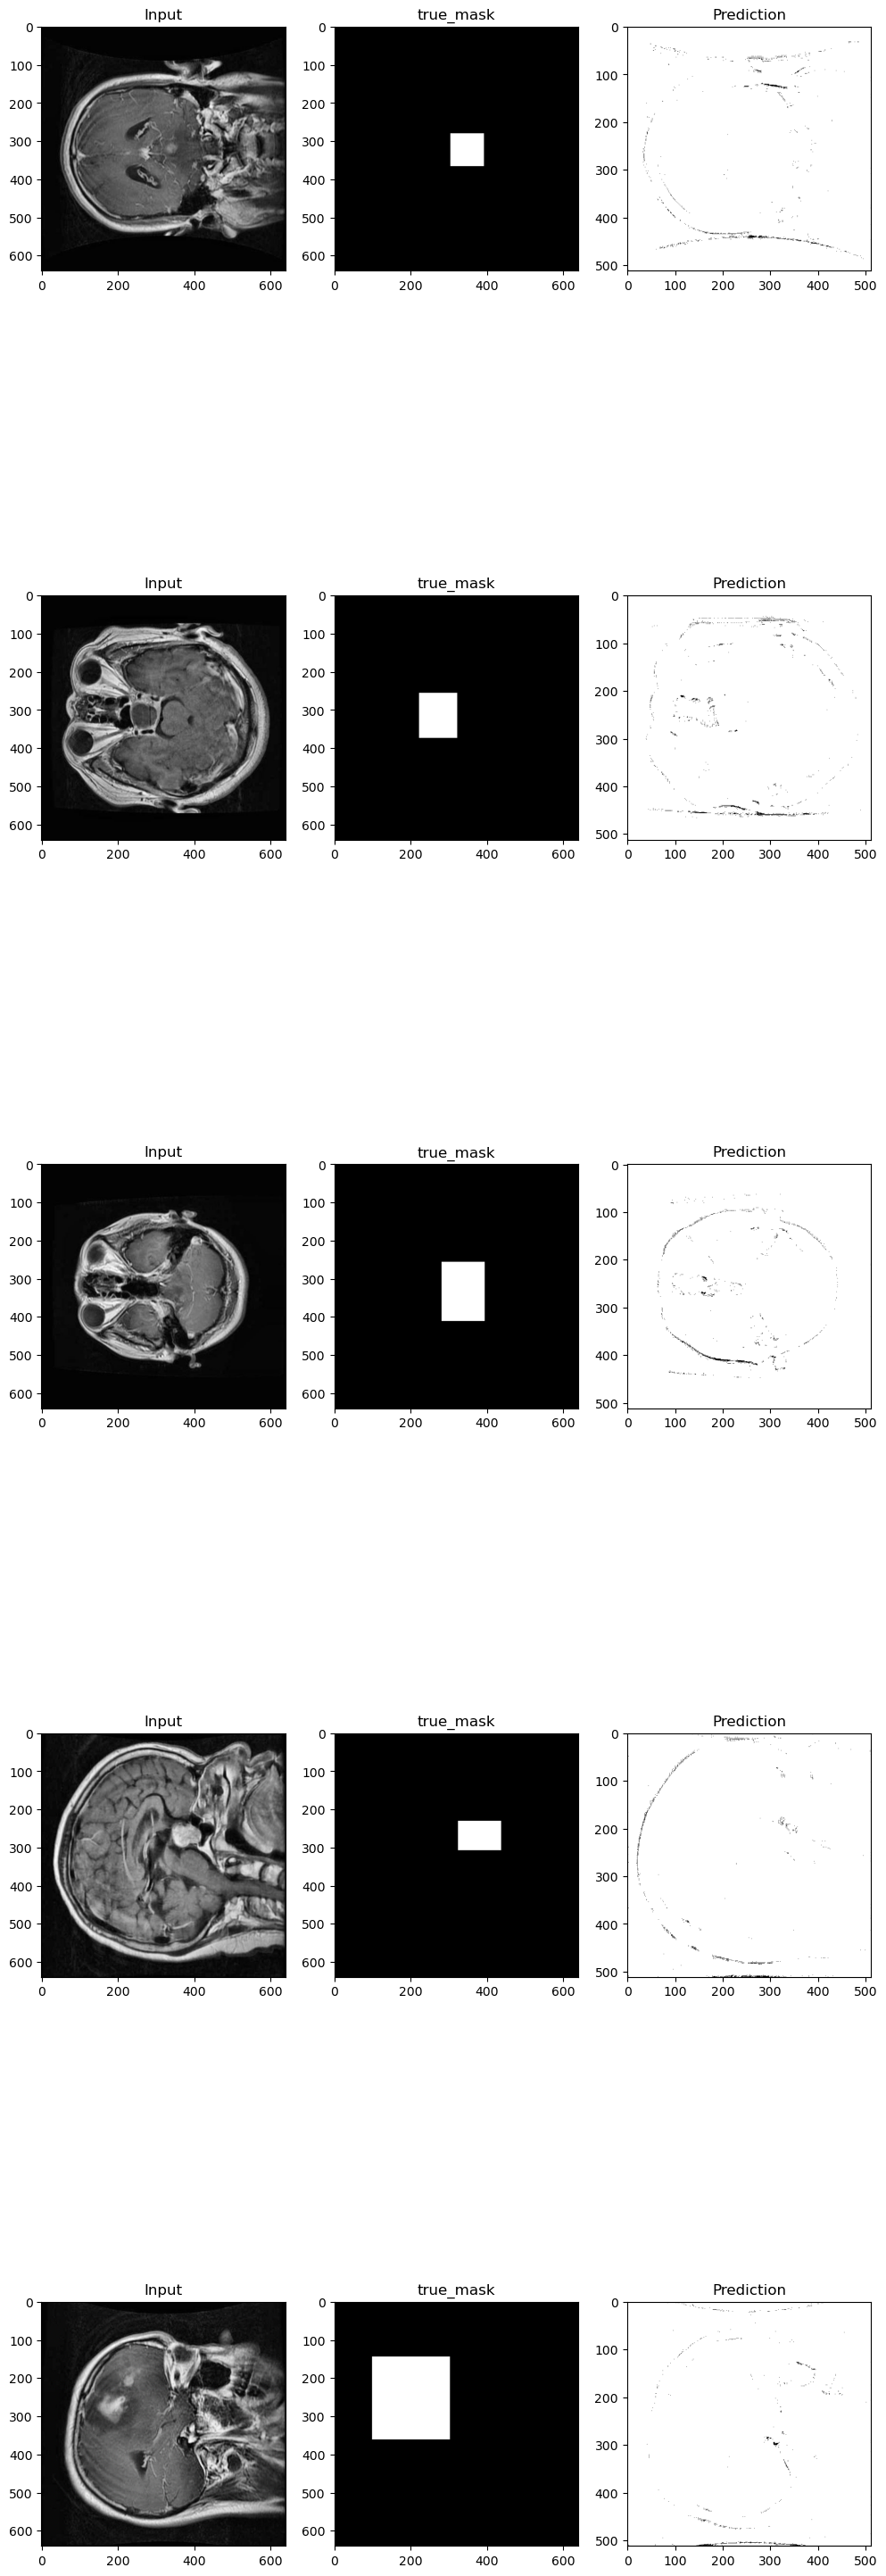

In [49]:
import matplotlib.pyplot as plt
def test_random_images(n=1):
  # select n random images
  # use cv and plt to show these images
    test_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/test_masks/'

    indices = np.random.randint(0, len(test_annotations['images']), size=n)

    images =[test_annotations['images'][i] for i in indices ]

    annotations = [test_annotations['annotations'][i] for i in indices ]
    j=1
    plt.figure(figsize=(12, 4 * 2 * n))
    for img,ann in zip(images,annotations):
        plt.subplot(n,3,j)
        j+=1
        image = cv2.imread(test_path + img['file_name'])
        plt.imshow(image)
        plt.title("Input")
        mask = predict(test_path + img['file_name'],model)
#         print(mask.shape)
        
        result_image = np.zeros((512, 512,1), dtype=np.uint8)
        
        result_image[mask == 1] = 255
        
        true_mask = cv2.imread(test_mask_dir + img['file_name'])
        plt.subplot(n,3,j)
        j+=1
        plt.imshow(true_mask)
        plt.title("true_mask")
        
        plt.subplot(n,3,j)
        j+=1
        plt.imshow(result_image,cmap='gray')
        plt.title("Prediction")
        
        

        

test_random_images()

In [61]:
## test

In [63]:
import os 
import glob
import json
import numpy as np
import cv2

from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint

In [65]:
# loading any random image
train_path = 'C:/Users/gonca/Desktop/LiveCell/train/'
test_path  = 'C:/Users/gonca/Desktop/LiveCell/test/'
valid_path   = 'C:/Users/gonca/Desktop/LiveCell/valid/'

In [67]:
train_data=[image for image in os.listdir(train_path)]
test_data=[image for image in os.listdir(test_path)]
valid_data=[image for image in os.listdir(valid_path)]

In [69]:
train_annotation=glob.glob(os.path.join(train_path,"*.json"))
test_annotation=glob.glob(os.path.join(test_path,"*.json"))
valid_annotation=glob.glob(os.path.join(valid_path,"*.json"))

In [71]:
train_annotation=json.load(open(train_annotation[0]))
test_annotation=json.load(open(test_annotation[0]))
valid_annotation=json.load(open(valid_annotation[0]))

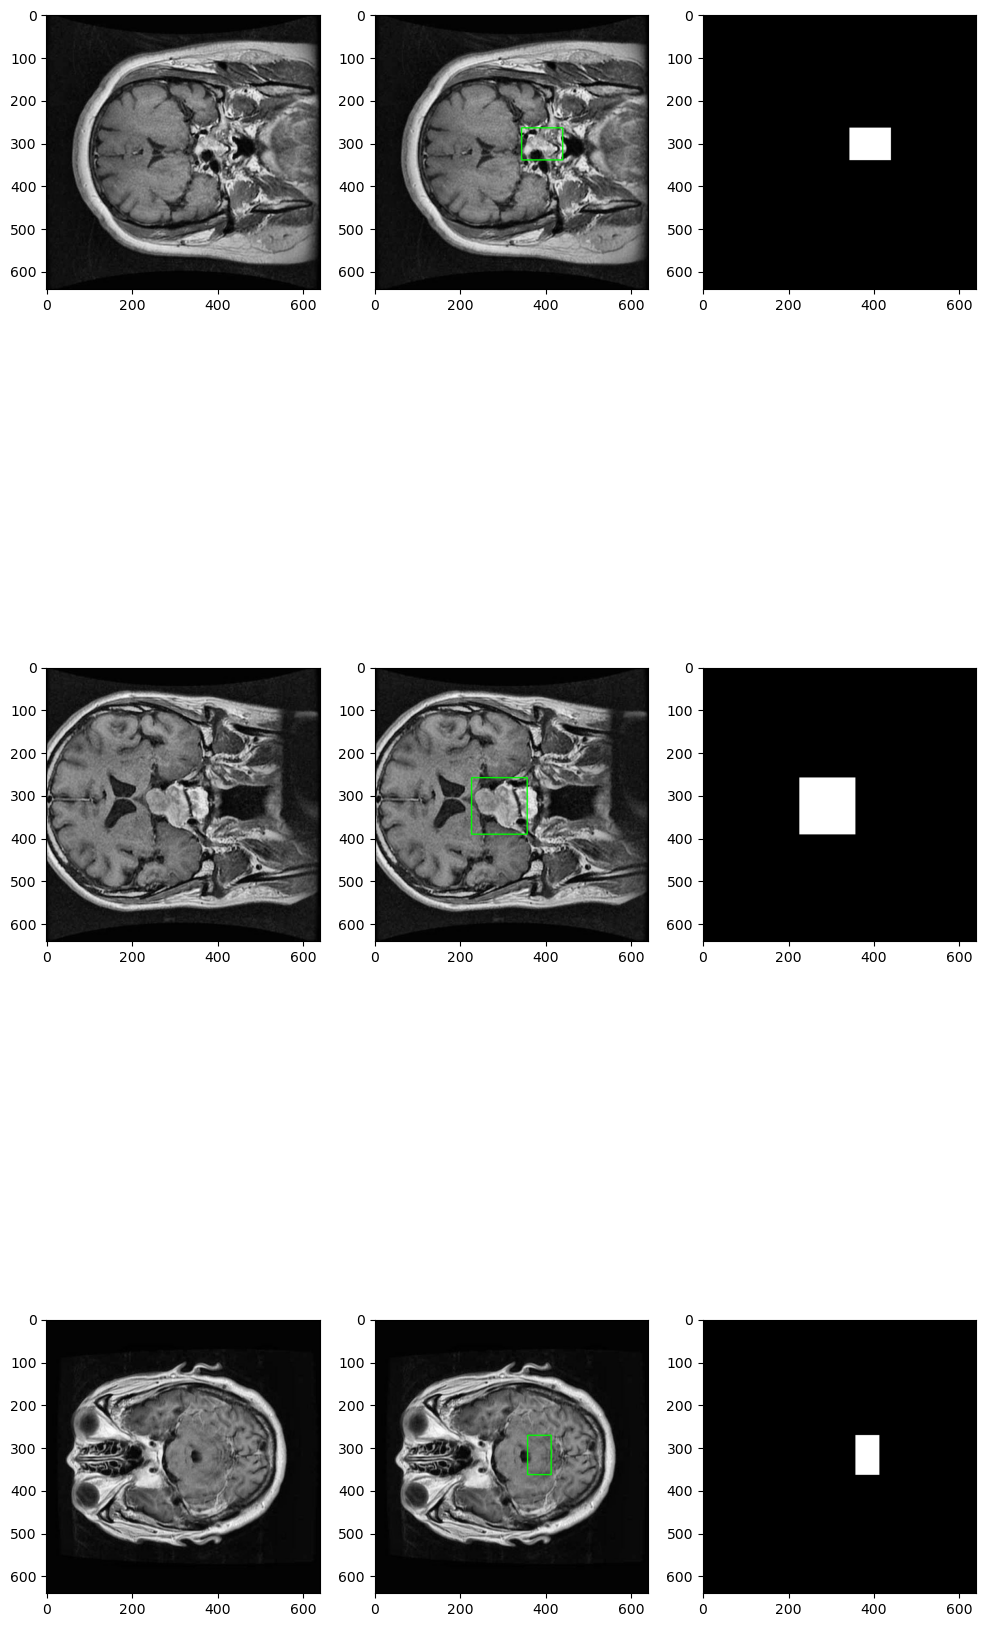

In [73]:
import matplotlib.pyplot as plt

def visualize_random_images(n=3): # select n random images

  # use cv and plt to show these images
  indices = np.random.randint(0, len(train_annotation['images']), size=n)

    #Image and Annotation Retrieval:
  images =[train_annotation['images'][i] for i in indices ]
  annotations = [train_annotation['annotations'][i] for i in indices ]
    
  j=1
  plt.figure(figsize=(12, 4 * 2 * n))
  for img,ann in zip(images,annotations):
    
    plt.subplot(n,3,j)
    j+=1
    image = cv2.imread(train_path + img['file_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    
    # create masked images from annotations
    segmentation = ann['segmentation']
    segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2) #convert 1D into 2D

    cv2.polylines(image, [segmentation], isClosed=True, color=(0, 255, 0), thickness=2)  # Green color with thickness 2

    plt.subplot(n,3,j)
    plt.imshow(image)
    j+=1
    
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    cv2.fillPoly(mask, [segmentation], color=1)
    plt.subplot(n,3,j)
    plt.imshow(mask,cmap='gray')
    j+=1

visualize_random_images()

In [75]:
def _train_masks():
    print('train masks')
    mask_dir = 'C:/Users/gonca/Desktop/LiveCell/train_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    totalImages = len(train_annotation['images'])
    done = 0
    for img,ann in zip(train_annotation['images'],train_annotation['annotations']):
        path = train_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"train  {done} / {totalImages} ")

def _test_masks():
    print('test masks')

    totalImages = len(test_annotation['images'])
    done = 0
    mask_dir = 'C:/Users/gonca/Desktop/LiveCell/test_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    
    for img,ann in zip(test_annotation['images'],test_annotation['annotations']):
        path = test_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1

        print(f"test  {done} / {totalImages} ")


def _val_masks():
    print('val masks')
    totalImages = len(valid_annotation['images'])
    done = 0
    mask_dir = 'C:/Users/gonca/Desktop/LiveCell/val_masks/'
    os.makedirs(mask_dir, exist_ok=True)
    
    for img,ann in zip(valid_annotation['images'],valid_annotation['annotations']):
        path = valid_path + img['file_name']
        mask_path = mask_dir + img['file_name']
        # load image in open cv
        image = cv2.imread(path)
        segmentation = ann['segmentation']
        segmentation = np.array(segmentation[0], dtype=np.int32).reshape(-1, 2)
        mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        cv2.fillPoly(mask, [segmentation], color=(255,255,255))
        cv2.imwrite(mask_path, mask)
        done+=1
        print(f"val  {done} / {totalImages} ")


from threading import Thread
def make_masks():
  threads = []
  threads.append( Thread(target=_train_masks))

  threads.append( Thread(target=_test_masks))

  threads.append( Thread(target=_val_masks))
  for t in threads:
    t.start()
  for t in threads:
    t.join()
  print('complete')
  return

make_masks()

train masks
test masks
val masks
val  1 / 429 
test  1 / 215 
train  1 / 1502 
test  2 / 215 
val  2 / 429 
train  2 / 1502 
val  3 / 429 
test  3 / 215 
train  3 / 1502 
test  4 / 215 
val  4 / 429 
train  4 / 1502 
test  5 / 215 
val  5 / 429 
train  5 / 1502 
val  6 / 429 
test  6 / 215 
train  6 / 1502 
val  7 / 429 
train  7 / 1502 
test  7 / 215 
val  8 / 429 
train  8 / 1502 
test  8 / 215 
val  9 / 429 
test  9 / 215 
train  9 / 1502 
val  10 / 429 
test  10 / 215 
train  10 / 1502 
val  11 / 429 
test  11 / 215 
train  11 / 1502 
val  12 / 429 
test  12 / 215 
train  12 / 1502 
val  13 / 429 
test  13 / 215 
train  13 / 1502 
val  14 / 429 
test  14 / 215 
train  14 / 1502 
val  15 / 429 
test  15 / 215 
train  15 / 1502 
val  16 / 429 
test  16 / 215 
train  16 / 1502 
val  17 / 429 
train  17 / 1502 
test  17 / 215 
val  18 / 429 
train  18 / 1502 
test  18 / 215 
val  19 / 429 
train  19 / 1502 
test  19 / 215 
val  20 / 429 
test  20 / 215 
train  20 / 1502 
val  21 / 429 

In [77]:
def load_data():
    target_size = (128, 128)
    train_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/train_masks/'
    
    X_train =  [cv2.resize(cv2.imread(train_path + image['file_name']),target_size) for image in train_annotation['images']]
    y_train = [cv2.resize(cv2.imread(train_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size ) for image in train_annotation['images']]
    X_train = np.array(X_train)
    y_train = np.expand_dims(np.array(y_train), axis=-1)
    
    X_train = X_train.astype('float32') / 255.0
    y_train = y_train.astype('float32') / 255.0
    y_train = (y_train > 0.5).astype(np.float32)
    
    

    

    val_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/val_masks/'
    X_val =  [cv2.resize(cv2.imread(valid_path + image['file_name']),target_size) for image in valid_annotation['images']]
    y_val = [cv2.resize(cv2.imread(val_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in valid_annotation['images']]
    X_val = np.array(X_val)
    y_val = np.expand_dims(np.array(y_val), axis=-1)

    X_val = X_val.astype('float32') / 255.0
    y_val = y_val.astype('float32') / 255.0
    y_val = (y_val > 0.5).astype(np.float32)
    
    return X_train,y_train,X_val,y_val



def load_test_data():
    target_size = (128, 128)

    test_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/test_masks/'
    X_test =  [cv2.resize(cv2.imread(test_path + image['file_name']),target_size) for image in test_annotation['images']]
    y_test = [cv2.resize(cv2.imread(test_mask_dir + image['file_name'],cv2.IMREAD_GRAYSCALE),target_size) for image in test_annotation['images']]
    X_test = np.array(X_test)
    y_test = np.expand_dims(np.array(y_test), axis=-1)

        
    X_test = X_test.astype('float32') / 255.0
    y_test = y_test.astype('float32') / 255.0
    y_test = (y_test > 0.5).astype(np.float32)
    return X_test,y_test

In [79]:
X_train,y_train,X_val,y_val = load_data()

In [80]:
def double_conv_block(x, n_filters):

    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

    return x

In [83]:
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)

    return f, p

In [85]:
def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x

In [87]:
def build_unet_model():

    # inputs
    inputs = layers.Input(shape=(128,128,3))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(u9)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

In [89]:
unet_model = build_unet_model()

In [91]:
unet_model.compile(optimizer="adam",loss="BinaryCrossentropy",metrics=["accuracy"])

In [93]:
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64,    │          0 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │     73,856 │ dropout[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32, 32,    │          0 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │    295,168 │ dropout_1[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_23[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16, 16,    │          0 │ max_pooling2d_6[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ dropout_2[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_25[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 8, 8, 512) │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 8, 8, 512) │          0 │ max_pooling2d_7[

 Total params: 34,513,345 (131.66 MB)

 Trainable params: 34,513,345 (131.66 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',patience=5)
                            


callbacks_list = [earlystop]

unet_model.fit(X_train,y_train,epochs=3,validation_data=(X_val,y_val),callbacks=callbacks_list)

Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 503s 11s/step - accuracy: 0.9640 - loss: 0.1217 - val_accuracy: 0.9627 - val_loss: 0.1203
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 513s 11s/step - accuracy: 0.9634 - loss: 0.1135 - val_accuracy: 0.9627 - val_loss: 0.1102
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 493s 11s/step - accuracy: 0.9627 - loss: 0.1108 - val_accuracy: 0.9627 - val_loss: 0.1091


In [101]:
def predict(image_path, model, threshold=0.5):
    
    # Read and preprocess the image
    image = cv2.imread(image_path)
    print("Original Image Shape:", image.shape)
    
    # Resize the image to match model's expected sizing
    resized_image = cv2.resize(image, (128, 128))
    print("Resized Image Shape:", resized_image.shape)
    
    # Expand dimensions to match the batch size used by the model
    input_image = np.expand_dims(resized_image, axis=0)
    
    # Preprocess input (normalize to [0, 1] range)
    input_image = input_image.astype('float32') / 255.0
    
    # Perform prediction
    pred_mask = model.predict(input_image)
    
    # Apply threshold to prediction mask
    pred_mask[pred_mask >= threshold] = 1  # set values >= threshold to 1 (foreground)
    pred_mask[pred_mask < threshold] = 0   # set values < threshold to 0 (background)
    
    # If your model outputs probabilities, you might need to squeeze the mask
    pred_mask = np.squeeze(pred_mask, axis=0)
    
    # Count number of pixels where mask is 1 (foreground)
    num_pixels = np.count_nonzero(pred_mask)
    print("shape mask",pred_mask.shape)
    return pred_mask

Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
shape mask (128, 128, 1)
Original Image Shape: (640, 640, 3)
Resized Image Shape: (128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
shape mask (128, 128, 1)


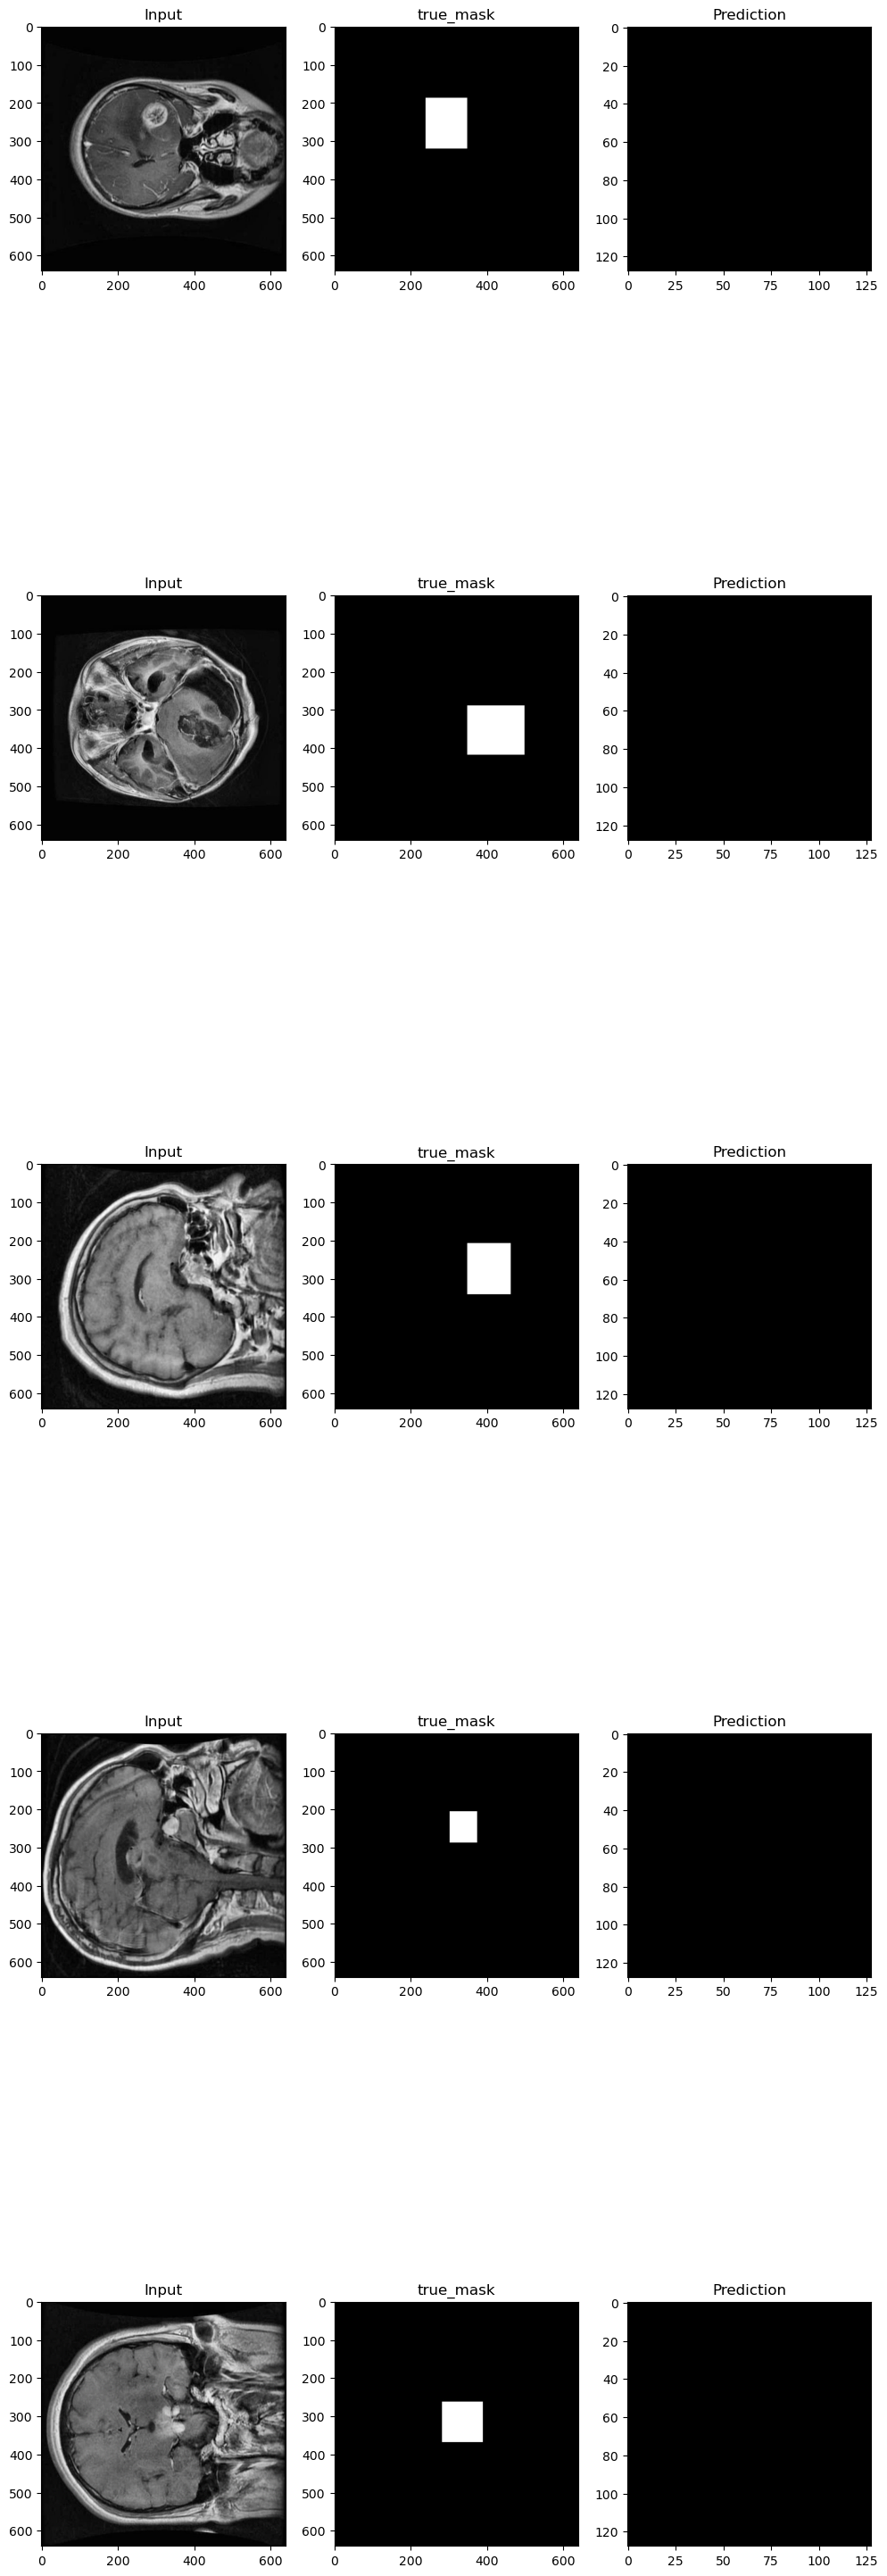

In [103]:
import matplotlib.pyplot as plt
def test_random_images(n=5):
  # select n random images
  # use cv and plt to show these images
    test_mask_dir = 'C:/Users/gonca/Desktop/LiveCell/test_masks/'

    indices = np.random.randint(0, len(test_annotation['images']), size=n)

    images =[test_annotation['images'][i] for i in indices ]

    annotations = [test_annotation['annotations'][i] for i in indices ]
    j=1
    plt.figure(figsize=(12, 4 * 2 * n))
    for img,ann in zip(images,annotations):
        plt.subplot(n,3,j)
        j+=1
        image = cv2.imread(test_path + img['file_name'])
        
        plt.imshow(image)
        plt.title("Input")
        mask = predict(test_path + img['file_name'],unet_model)
        
        result_image = np.zeros((128, 128,1), dtype=np.uint8)
        result_image[mask == 1] = 255
        
        true_mask = cv2.imread(test_mask_dir + img['file_name'])
        plt.subplot(n,3,j)
        j+=1
        plt.imshow(true_mask)
        plt.title("true_mask")
        
        plt.subplot(n,3,j)
        j+=1
        plt.imshow(result_image,cmap='gray')
        plt.title("Prediction")

test_random_images()